Load the liabrary


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_classif
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
import seaborn as sns
from models import train

Load data


In [135]:
df = pd.read_csv("../data/laptop_final.csv")
df.head(5)

,link,name,Display Size,Resolution: width,Resolution: height,Refresh Rate,Panel Type,Disk Capacity,SSD,HDD,...,GPU: Name,GPU: Process Size (nm),GPU: Architecture,GPU: Memory Type,GPU: Memory Frequency (MHz),GPU: Memory Size,GPU: Base Clock,GPU: Memory Bus,GPU: Release quarter,GPU: Power Consumption
0,https://laptopmedia.com/laptop-specs/asus-rog-...,ASUS ROG Strix G17,17.3,2560.0,1440.0,240.0,IPS + G-Sync,2000.0,1.0,0.0,...,"geforce rtx 4060 (laptop, 140w)",4.0,Ada Lovelace,DDR6,2000.0,8.0,1920.0,128.0,2023.0,140.0
1,https://laptopmedia.com/laptop-specs/asus-rog-...,ASUS ROG Zephyrus Duo 16,16.0,2560.0,1600.0,240.0,IPS + FreeSync,16000.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://laptopmedia.com/laptop-specs/asus-rog-...,ASUS ROG Zephyrus Duo 16,16.0,2560.0,1600.0,240.0,IPS + FreeSync,2000.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://laptopmedia.com/laptop-specs/asus-rog-...,ASUS ROG Zephyrus Duo 16,16.0,2560.0,1600.0,240.0,IPS + FreeSync,2000.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://laptopmedia.com/laptop-specs/asus-rog-...,ASUS ROG Strix G17,17.3,2560.0,1440.0,240.0,IPS + G-Sync,2000.0,1.0,0.0,...,"geforce rtx 4060 (laptop, 140w)",4.0,Ada Lovelace,DDR6,2000.0,8.0,1920.0,128.0,2023.0,140.0


In [136]:
print(df.columns)

Index(['link', 'name', 'Display Size', 'Resolution: width',
       'Resolution: height', 'Refresh Rate', 'Panel Type', 'Disk Capacity',
       'SSD', 'HDD', 'SSHD', 'Optane', 'RAM Capacity', 'RAM Type', 'OS',
       'Body material: plastic / polycarbonate', 'Body material: aluminum',
       'Body material: magnesium alloy', 'Body material: glass fiber',
       'Body material: carbon', 'Body material: magnesium-lithium alloy',
       'Body material: plastic', 'Body material: matte',
       'Body material: black synthetic material', 'Dimension: Depth', 'Weight',
       'Num of M.2 Slot', 'USB Type-C', 'USB Type-A', 'HDMI', 'Bluetooth',
       'Card Reader', 'Ethernet LAN', 'Security Lock slot',
       'Fingerprint reader', 'Backlit keyboard', 'Total Score',
       'Portability Score', 'Display Score', 'Work Score', 'Play Score',
       'Cost', 'CPU: Name', 'CPU: Codename', 'CPU: Max operating temperature',
       'CPU: Core', 'CPU: Thread', 'CPU: Base frequency', 'CPU: Max frequency',
  

Encoding features(using the target encoding)

In [137]:
target="Display Score"
df2=df.drop(columns=["link","name","Total Score","Work Score","Portability Score","Play Score","Cost","CPU: Codename","GPU: Name","CPU: Name","Ethernet LAN"])

In [138]:
df2.isnull().sum()

Display Size                                   0
Resolution: width                              0
Resolution: height                             0
Refresh Rate                                   0
Panel Type                                     0
Disk Capacity                                  0
SSD                                            0
HDD                                            0
SSHD                                           0
Optane                                         0
RAM Capacity                                 301
RAM Type                                   37543
OS                                           707
Body material: plastic / polycarbonate         0
Body material: aluminum                        0
Body material: magnesium alloy                 0
Body material: glass fiber                     0
Body material: carbon                          0
Body material: magnesium-lithium alloy         0
Body material: plastic                         0
Body material: matte

Drop nan value due to large dataset

In [139]:
df3 = df2.dropna()
df3.shape

(162759, 51)

Add features following our knowledge about laptop architecture

In [140]:
df3['Aspect Ratio'] = df3['Resolution: width'] / df3['Resolution: height']
df3['Pixel Density'] = ((df3['Resolution: width']**2 + df3['Resolution: height']**2)**0.5) / df3['Display Size']
df3['GPU Performance'] = df3['GPU: Memory Size'] * df3['GPU: Memory Frequency (MHz)']


C:\Users\Acer\AppData\Local\Temp\ipykernel_11372\1828069219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Aspect Ratio'] = df3['Resolution: width'] / df3['Resolution: height']
C:\Users\Acer\AppData\Local\Temp\ipykernel_11372\1828069219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Pixel Density'] = ((df3['Resolution: width']**2 + df3['Resolution: height']**2)**0.5) / df3['Display Size']
C:\Users\Acer\AppData\Local\Temp\ipykernel_11372\1828069219.py:3: SettingWithCopyWarning: 
A value i

In [141]:
numerical_features=["Display Size","Refresh Rate","Resolution: width","Resolution: height","Disk Capacity","RAM Capacity","Dimension: Depth","Weight",
                    "Num of M.2 Slot","USB Type-C","USB Type-A","HDMI","Bluetooth",
                    "CPU: Max operating temperature","CPU: Core","CPU: Thread","CPU: Base frequency",
                    "CPU: Max frequency","CPU: Release quarter","CPU: LL Cache","CPU: Lithography",
                    "GPU: Process Size (nm)","GPU: Memory Frequency (MHz)","GPU: Memory Size",
                    "GPU: Base Clock","GPU: Memory Bus","GPU: Release quarter","GPU: Power Consumption"]+[
                        "Aspect Ratio","Pixel Density","GPU Performance"
                    ]
                    


categorical_features=list(set(df3.columns.tolist())-set(numerical_features+[target]))
print(categorical_features)
print(len(categorical_features))

['Body material: plastic', 'HDD', 'Body material: glass fiber', 'Body material: magnesium-lithium alloy', 'Optane', 'Body material: magnesium alloy', 'GPU: Architecture', 'Fingerprint reader', 'Body material: black synthetic material', 'Security Lock slot', 'Backlit keyboard', 'SSHD', 'Body material: aluminum', 'Panel Type', 'SSD', 'GPU: Memory Type', 'RAM Type', 'OS', 'Body material: plastic / polycarbonate', 'Body material: carbon', 'Card Reader', 'Body material: matte']
22


Divide to train test split before encode to prevent overfiting

In [142]:
df3 = df3.dropna()
X=df3.drop(columns=[target])
y=df3[target]

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=111)

In [144]:
cols_to_encode=["Panel Type","RAM Type","OS","GPU: Architecture","GPU: Memory Type"]

Encode categorical columns using target encoding

In [145]:
for col in cols_to_encode:
    print(f"Number of categories in {col}: ",df3[col].nunique())

Number of categories in Panel Type:  11
Number of categories in RAM Type:  5
Number of categories in OS:  9
Number of categories in GPU: Architecture:  40
Number of categories in GPU: Memory Type:  3


In [146]:
encoder=TargetEncoder(cols=cols_to_encode)
X_train=encoder.fit_transform(X_train,y_train)
X_test=encoder.transform(X_test)

Features Selection

In [148]:
X_train[numerical_features]=(X_train[numerical_features] -X_train[numerical_features].mean())/X_train[numerical_features].std()
X_train

,Display Size,Resolution: width,Resolution: height,Refresh Rate,Panel Type,Disk Capacity,SSD,HDD,SSHD,Optane,...,GPU: Memory Type,GPU: Memory Frequency (MHz),GPU: Memory Size,GPU: Base Clock,GPU: Memory Bus,GPU: Release quarter,GPU: Power Consumption,Aspect Ratio,Pixel Density,GPU Performance
66364,-1.680880,4.070981,4.351417,-0.713147,7.416692,-0.584523,1.0,0.0,0.0,0.0,...,6.514683,-0.535266,-0.890303,2.296201,-0.973574,1.278095,-0.213628,-2.244810,5.090030,-0.418533
34024,-0.163703,-0.285270,-0.337615,0.173155,7.416692,0.793880,1.0,0.0,0.0,0.0,...,7.448419,2.066691,0.114095,0.791847,0.374431,0.456626,0.615473,0.423302,-0.263559,0.628607
246049,-0.163703,1.166813,0.941212,1.945759,7.416692,-0.382188,1.0,0.0,0.0,0.0,...,7.448419,-0.155814,1.118492,0.198227,1.722437,1.278095,1.859125,0.423302,1.119226,-0.113117
149016,-0.163703,-0.285270,-0.337615,0.527676,7.416692,-0.382188,1.0,0.0,0.0,0.0,...,7.448419,-0.210021,0.114095,0.791847,0.374431,0.456626,0.304560,0.423302,-0.263559,-0.287641
182864,-1.680880,-1.542230,-1.445931,-0.713147,2.260556,-0.679367,1.0,0.0,0.0,0.0,...,6.514683,-0.535266,-0.890303,-0.990948,-0.973574,-0.364842,-0.939092,0.436330,-1.123617,-0.418533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198901,1.448299,-0.285270,-0.337615,-0.713147,7.416692,0.003512,1.0,1.0,0.0,0.0,...,6.514683,-0.535266,-0.890303,-0.990948,-0.973574,-0.364842,-0.939092,0.423302,-0.671201,-0.418533
195040,-0.163703,-1.542230,-1.445931,-0.713147,2.260556,-0.584523,1.0,0.0,0.0,0.0,...,6.514683,-0.535266,-0.890303,-0.990948,-0.973574,-0.364842,-0.939092,0.436330,-1.460878,-0.418533
233994,-0.163703,-0.285270,-0.337615,0.527676,7.416692,0.793880,1.0,0.0,0.0,0.0,...,7.448419,-0.155814,1.118492,0.778312,1.722437,0.182803,1.651849,0.423302,-0.263559,-0.113117
20107,1.448299,-0.285270,-0.337615,-0.713147,7.416692,-0.391673,1.0,0.0,0.0,0.0,...,6.514683,-0.535266,-0.890303,-0.990948,-0.973574,-0.364842,-0.939092,0.423302,-0.671201,-0.418533


Using mutual info and anova to find the most relevant categorical features

In [149]:
X_train.isnull().sum()

Display Size                               0
Resolution: width                          0
Resolution: height                         0
Refresh Rate                               0
Panel Type                                 0
Disk Capacity                              0
SSD                                        0
HDD                                        0
SSHD                                       0
Optane                                     0
RAM Capacity                               0
RAM Type                                   0
OS                                         0
Body material: plastic / polycarbonate     0
Body material: aluminum                    0
Body material: magnesium alloy             0
Body material: glass fiber                 0
Body material: carbon                      0
Body material: magnesium-lithium alloy     0
Body material: plastic                     0
Body material: matte                       0
Body material: black synthetic material    0
Dimension:

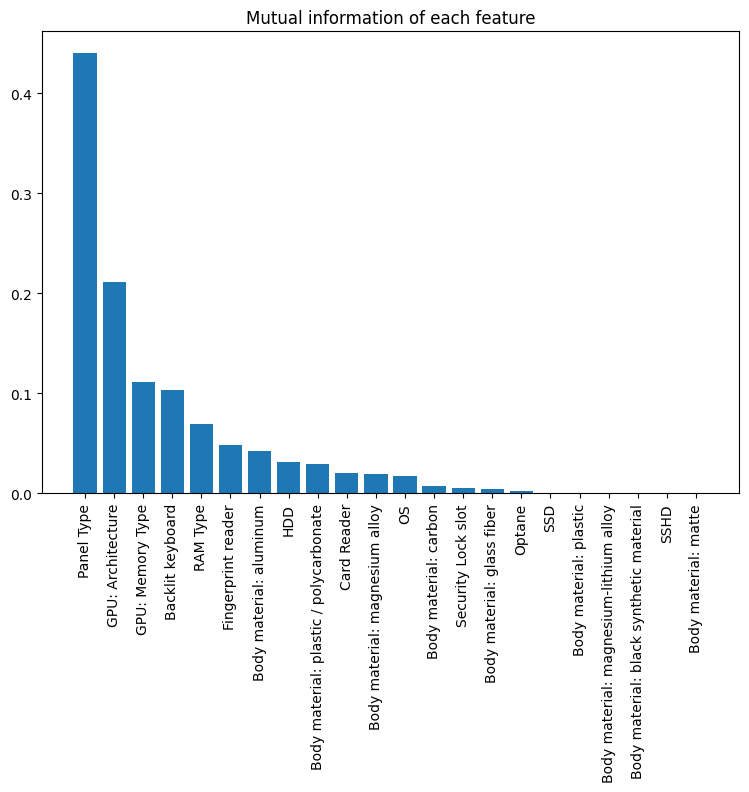

In [150]:
# mutual info
fs = SelectKBest(score_func=mutual_info_regression, k=10)
fs.fit(X_train[categorical_features],y_train)
d=sorted([(a,b) for a,b in zip(categorical_features,fs.scores_)],key=lambda x:x[1],reverse=True)
d={a:b for a,b in d}
plt.figure(figsize=(9,6))
plt.bar(d.keys(),d.values())
plt.xticks(rotation=90)
plt.title("Mutual information of each feature")
plt.show()

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0  8 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


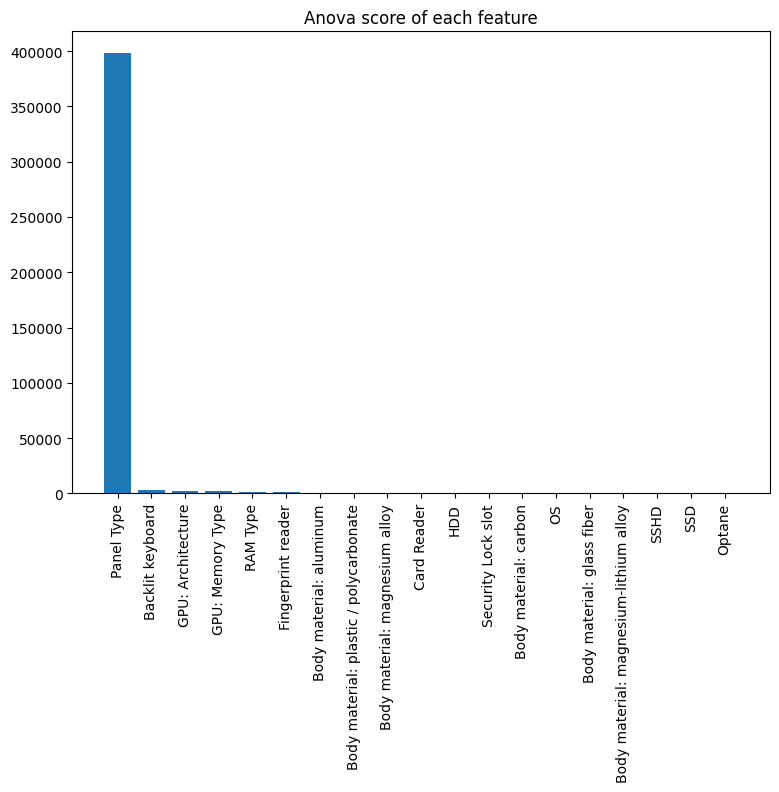

In [151]:
#anova
fs2 = SelectKBest(score_func=f_classif, k=10)
fs2.fit(X_train[categorical_features],y_train)
fs2.get_feature_names_out()
e=sorted([(a,b) for a,b in zip(categorical_features,fs2.scores_) if not np.isnan(b)],key=lambda x:x[1],reverse=True)
e={a:b for a,b in e}
plt.figure(figsize=(9,6))
plt.bar(e.keys(),e.values())
plt.xticks(rotation=90) 
plt.title("Anova score of each feature")
plt.show()

Using pearson correlation to find the most relevant numerical features

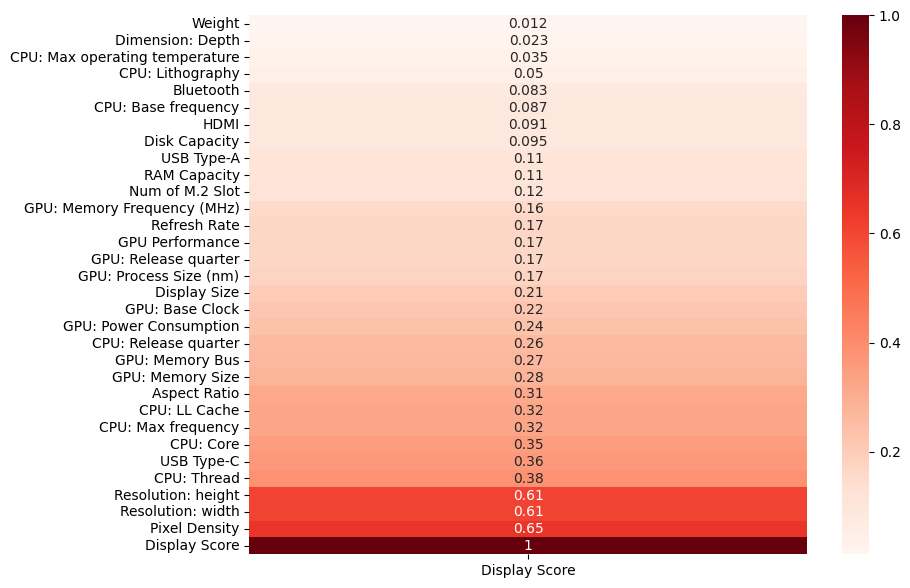

In [152]:
train_set=X_train.join(y_train)
corr_df=train_set[numerical_features+[target]]
target_correlation = corr_df.corr()[[target]]
plt.figure(figsize=(9,7))
sns.heatmap(target_correlation.abs().sort_values(by=target), annot=True, cmap=plt.cm.Reds)
plt.show()

Using RamdomForest to choose important features in 2 groups

In [153]:
candidate_num_features = target_correlation[target].abs().sort_values(ascending=False).index[1:6].tolist()
d=sorted([(a,b) for a,b in zip(categorical_features,fs.scores_)],key=lambda x:x[1],reverse=True)
candidate_cat_features = list(feat[0] for feat in d[:5])
candidate_featues = candidate_cat_features + candidate_num_features
print(candidate_featues)

['Panel Type', 'GPU: Architecture', 'GPU: Memory Type', 'Backlit keyboard', 'RAM Type', 'Pixel Density', 'Resolution: width', 'Resolution: height', 'CPU: Thread', 'USB Type-C']


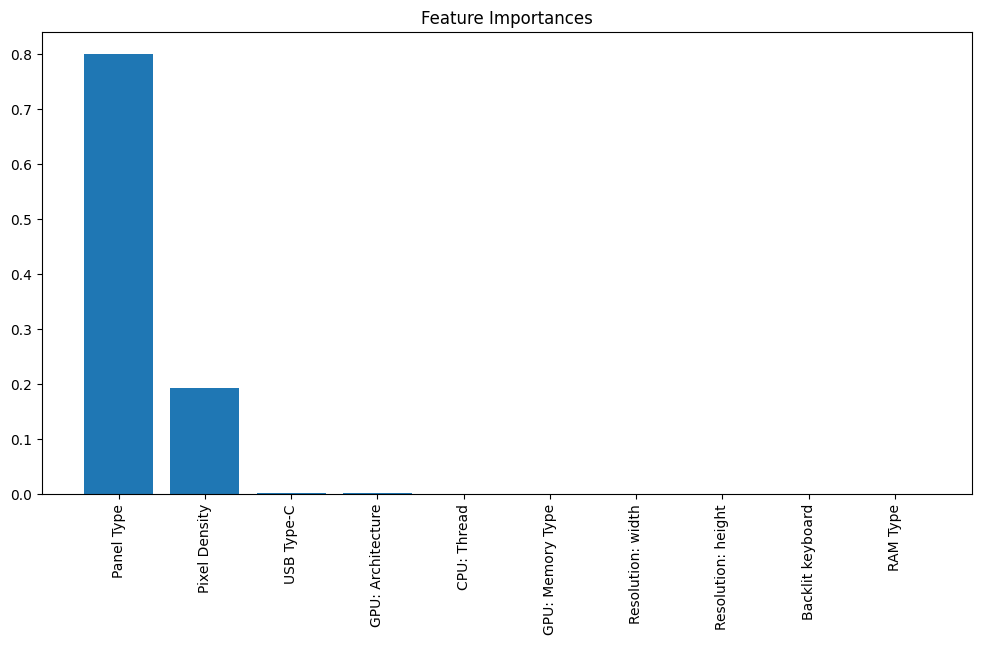

In [154]:
candidate_X = X_train[candidate_featues]
model = RandomForestRegressor()
model.fit(candidate_X, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), candidate_X.columns[indices], rotation='vertical')
plt.show()